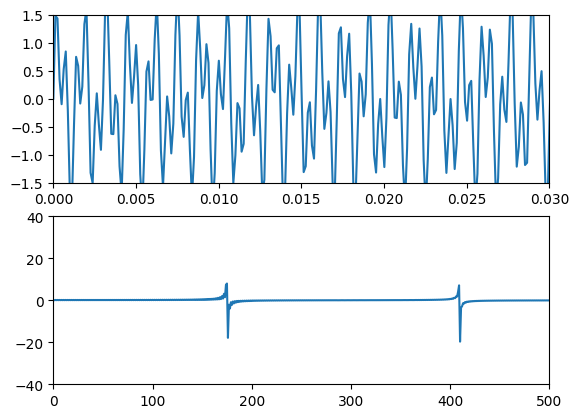

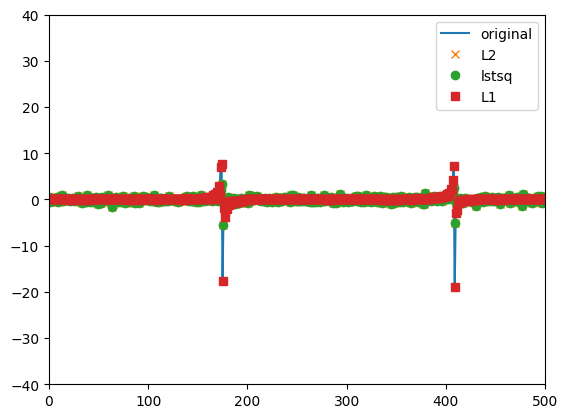

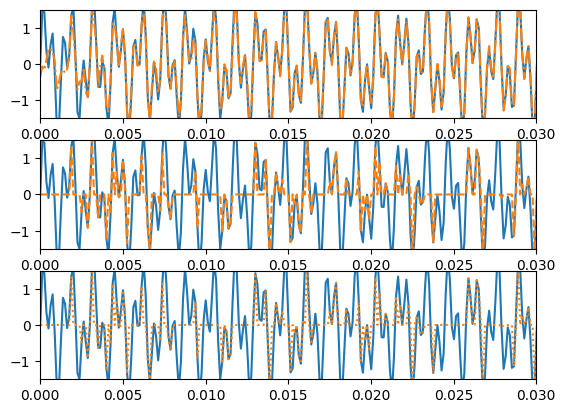

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from numpy.linalg import pinv
import cvxpy as cp

# Clear all previous figures
plt.close('all')

# Parameters
N = 1000
t = np.linspace(0, 1/8, N)
f = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
# For playing sound, you would use a different library in Python, like sounddevice

# Discrete Cosine Transform
xc = dct(f, norm='ortho')

# Plotting
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, f)
plt.axis([0, 0.03, -1.5, 1.5])

plt.subplot(2, 1, 2)
w = np.linspace(1, N, N)
plt.plot(w, xc)
plt.axis([0, 500, -40, 40])
plt.show()

# Sampling
m = 300
perm = np.random.permutation(N)
A = dct(np.identity(N), norm='ortho')[perm[:m], :]
y = f[perm[:m]]

# Inverse problems
x2 = pinv(A) @ y
xm = np.linalg.lstsq(A, y, rcond=None)[0]

# L1 approximation using CVXPY
x1 = cp.Variable(N)
objective = cp.Minimize(cp.norm(x1, 1))
constraints = [A @ x1 == y]
prob = cp.Problem(objective, constraints)
prob.solve()

# Plotting results
plt.figure()
plt.plot(xc)
plt.plot(x2, 'x')
plt.plot(xm, 'o')
plt.plot(x1.value, 's')
plt.legend(['original', 'L2', 'lstsq', 'L1'])
plt.axis([0, 500, -40, 40])
plt.show()

# Reconstruction
f2 = idct(x2, norm='ortho')
fm = idct(xm, norm='ortho')
f1 = idct(x1.value, norm='ortho')

# Plotting reconstructed signals
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, f)
plt.axis([0, 0.03, -1.5, 1.5])
plt.plot(t, f1, '-.')

plt.subplot(3, 1, 2)
plt.plot(t, f)
plt.axis([0, 0.03, -1.5, 1.5])
plt.plot(t, f2, '--')

plt.subplot(3, 1, 3)
plt.plot(t, f)
plt.axis([0, 0.03, -1.5, 1.5])
plt.plot(t, fm, ':')
plt.show()

# For the last part with pcolor, you would use plt.pcolor() in Python
# but you need to ensure that CN is correctly defined as in your MATLAB script
